Para esse exercicio iremos mostrar que nem mesmo um modelo de aprendizado de maquina, não é capaz de dizer<br/> 
em 100% dos casos em quando uma lista está ordenada, importante resaltar que para esse modelo só foram considerados<br/>
os primeiros 20 elementos da lista para treinar o modelo, o que em um problema real não é suficiente para afirmar que estar ordenado.<br/>
Sendo em casos especificos utilizar o selection sort para ter certeza em 100% dos casos que a lista está ordenada.

In [2]:
import random, time
import pandas as pd
NUMBER_OF_ELEMENTS = 100
RANGE_OF_ELEMENTS = 100000

def generate_random_numbers():
     return random.sample(range(RANGE_OF_ELEMENTS), NUMBER_OF_ELEMENTS)

list_number = generate_random_numbers()


In [52]:

def selection_sort(list_number):
    size_list = len(list_number)
    for i in range(0,size_list):
        current = list_number[i]
        min_value =  min(list_number[i:])
        min_value_index = list_number.index(min(list_number[i:]))
        if current != min_value :
            list_number[i], list_number[min_value_index] = list_number[min_value_index] , list_number[i]
    return list_number

## Get time for execute the Sort algorithm with an array random

In [57]:
interation_with_random_numbers = []
time_for_execution = []
value = 100
for a in range(4):
    random_numbers = generate_random_numbers()
    #random_numbers = random.sample(range(100000), value)
    start = time.time()
    ordination = selection_sort(random_numbers)
    end = time.time()
    time_of_execution = end - start
    interation_with_random_numbers.append(value)
    time_for_execution.append(time_of_execution)
    value = value*10

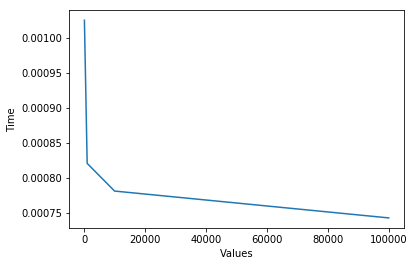

[0.0010254383087158203, 0.0008208751678466797, 0.0007812976837158203, 0.0007429122924804688]
[100, 1000, 10000, 100000]


In [58]:
import matplotlib.pyplot as plt
plt.xlabel("Values")
plt.ylabel("Time")
plt.plot(interation_with_random_numbers,time_for_execution)
plt.show()
print(time_for_execution)
print(interation_with_random_numbers)

## Get time for execute the Sort algorithm with an array sorted

In [59]:
interation_with_sorted_numbers = []
time_for_execution_sorted = []
value = 100
for a in range(4):
    random_numbers = generate_random_numbers()
    random_numbers.sort()
    start = time.time()
    ordination = selection_sort(random_numbers)
    end = time.time()
    time_of_execution = end - start
    interation_with_sorted_numbers.append(value)
    time_for_execution_sorted.append(time_of_execution)
    value = value*10

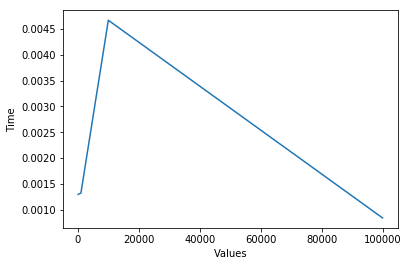

[0.0012950897216796875, 0.0013191699981689453, 0.004667997360229492, 0.0008389949798583984]
[100, 1000, 10000, 100000]


In [60]:
import matplotlib.pyplot as plt
plt.xlabel("Values")
plt.ylabel("Time")
plt.plot(interation_with_sorted_numbers,time_for_execution_sorted)
plt.show()
print(time_for_execution_sorted)
print(interation_with_sorted_numbers)

In [25]:
list_for_frame = [[]]
result = []
for i in range(0,900000):
    lis_number = generate_random_numbers()
    flag = random.randint(1,RANGE_OF_ELEMENTS)
    if flag % 3 == 0:
        lis_number.sort()
        result.append('True')
    else :
        result.append('False')
        
    list_for_frame.append(lis_number[0:20])
df = pd.DataFrame(list_for_frame,columns=['Elem :1','Elem :2','Elem :3','Elem :4','Elem :5','Elem :6','Elem :7',
                        'Elem :8','Elem :9','Elem :10','Elem :11','Elem :12','Elem :13','Elem :14',
                      'Elem :15','Elem :16','Elem :17','Elem :18','Elem :19','Elem :20'])

df = df.drop(df.index[0])

In [ ]:
list_pandas_series = pd.Series(result)
df['Result'] = list_pandas_series.values

In [ ]:
def make_target_frame(frame, target_column):
    df_mod = frame.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].map({'True':1, 'False':0})
    return (df_mod, targets)
frame, targets = make_target_frame(df, "Result")

In [ ]:
frame.head()

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
columns = list(frame.columns[0:20])

y = frame["Result"]
x = frame[columns]
tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)


### Acurácia

Afim de saber a capacidade do sistema de concluir de forma correta a classificação dos dados.


In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, hamming_loss
print(accuracy_score(y_test,predictions))

0.9997744107744108


In [87]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
(tn, fp, fn, tp)

(198542, 42, 25, 98391)


<b>tn</b> = Representa a quantidade de result = false, que foram acertados corretamente pelo modelo.<br/>
<b>fp</b> = Representa a quantidade de result = true, que foram errados pelo modelo.<br/>
<b>fn</b> = Representa a quantidade de result = false, que foram errados pelo modelo.<br/>
<b>tp</b> = Representa a quantidade de result = true, que foram acertados corretamente pelo modelo.<br/>

